In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

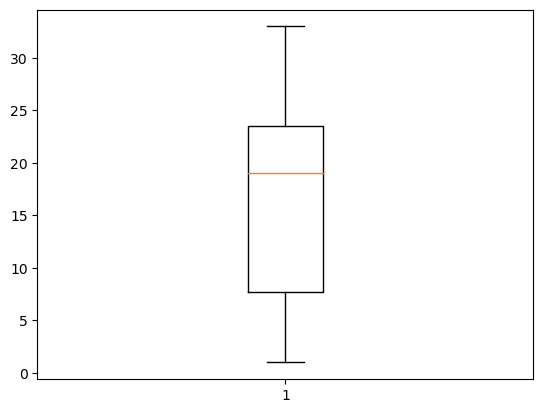

In [3]:
import numpy as np
np.random.seed(3)

arr = np.random.randint(1,34,20)

plt.boxplot(arr)
plt.show()

In [4]:
d = {"length":[23,45,78,90,45],"bredth":[56,78,90,89,68],"price":[2345,5678,9086,7890,4567]}
df = pd.DataFrame(d)

df['area'] = df["length"]*df["bredth"]

df

,length,bredth,price,area
0,23,56,2345,1288
1,45,78,5678,3510
2,78,90,9086,7020
3,90,89,7890,8010
4,45,68,4567,3060


# get_dummies -> for converting categorical data to binary data

In [5]:
data = {
    "city":['A','B','C','A'],
    "is_correct" : ['Y','N','Y','N'],
    "is_new" : ['N','N','Y','Y'],
    
}
df = pd.DataFrame(data)
pd.get_dummies(df[["city","is_new"]])

,city_A,city_B,city_C,is_new_N,is_new_Y
0,1,0,0,1,0
1,0,1,0,1,0
2,0,0,1,0,1
3,1,0,0,0,1


In [6]:
data = pd.DataFrame({"grade":['A','B','C','D','A']})
grades = {'A':1,'B':2,'C':3,'D':4}
data["num_grade"] = data["grade"].map(grades)

data

,grade,num_grade
0,A,1
1,B,2
2,C,3
3,D,4
4,A,1


In [7]:
df = pd.DataFrame({"price":np.random.randint(100000,30000000,5)})
bins = [0,3000000,60000000,np.inf]
labels =['Low','Medium','High']
df['price_found'] = pd.cut(df['price'],bins=bins,labels = labels)
df

,price,price_found
0,17995347,Medium
1,21137914,Medium
2,6284517,Medium
3,16949768,Medium
4,4561166,Medium


# Dimensionality Reduction

# PCA

In [8]:
import seaborn as sns

In [9]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

df = load_iris()
X = df.data

pca = PCA(n_components=2)
fitdata = pca.fit_transform(X)

print(X.shape)
print(fitdata.shape)

(150, 4)
(150, 2)


# SVD

In [10]:
from sklearn.decomposition import TruncatedSVD

X = np.random.rand(5,4)

svd = TruncatedSVD(n_components=2)
x_svd = svd.fit_transform(X)

print("Original ",X.shape)
print("New ",x_svd.shape)

Original  (5, 4)
New  (5, 2)


# LDA

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X,y = iris.data,iris.target

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X,y)

print(X.shape)
print(X_lda.shape)

(150, 4)
(150, 2)


# Feature Selection


In [12]:
from sklearn.feature_selection import SelectKBest,chi2

In [15]:
X_new = SelectKBest(chi2,k=2).fit_transform(iris.data,iris.target)
print("Original data ",iris.data.shape," Reduced ",X_new.shape)

Original data  (150, 4)  Reduced  (150, 2)


In [2]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame

x = df.iloc[:,:-1];
y = df.iloc[:,-1];

x_new =SelectKBest(chi2,k=1).fit_transform(x,y)

print("Original data ",iris.data.shape," Reduced ",x_new.shape)

Original data  (150, 4)  Reduced  (150, 1)


In [22]:
#Wrapper method

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [27]:
X,y = iris.data,iris.target
model = LogisticRegression(max_iter=200)

rfe = RFE(model,n_features_to_select=2)
fit=  rfe.fit(X,y)

print("Selection Features ",fit.support_)
print("Ranking ",fit.ranking_)


Selection Features  [False False  True  True]
Ranking  [3 2 1 1]


In [7]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Apply Lasso
lasso = LassoCV(cv=5)
lasso.fit(x,y)

print(lasso.coef_)
print("Number of selected features ",lasso.coef_!=0)


[  -6.49469328 -235.99308032  521.7443693   321.0607768  -569.43813385
  302.45319289   -0.          143.69851474  669.92267515   66.83551067]
Number of selected features  [ True  True  True  True  True  True False  True  True  True]
